In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt. style.use('ggplot')

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [6]:
df = pd.read_csv('coaster_db.csv')

In [7]:
df.shape

(1087, 56)

In [8]:
df.sample(5)

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
877,Superman: Ultimate Flight (Six Flags Discovery...,863 ft (263 m),62 mph (100 km/h),Six Flags Discovery Kingdom,Operating,"June 30, 2012[1]",Steel – Launched,Premier Rides,52 in (132 cm),Sky Rocket II,...,62 mph,100 km/h,62.0,mph,62.0,150.0,ft,NaN,1,NaN
512,Wild Mouse (Hersheypark),"1,213 ft (370 m)",28 mph (45 km/h),Hersheypark,Operating,"May 8, 1999",Steel,Mack Rides,48 in (122 cm),Compact Wild Mouse,...,28 mph,45 km/h,28.0,mph,28.0,45.0,ft,NaN,0,NaN
194,Alpen Blitz (Parque de la Ciudad),NaN,NaN,"Argentina, Villa Soldati, Buenos Aires",NaN,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
304,Sidewinder (Hersheypark),935 ft (285 m),47 mph (76 km/h),Hersheypark,Operating,"May 11, 1991",Steel – Shuttle – Boomerang,Vekoma,48 in (122 cm),Boomerang,...,47 mph,76 km/h,47.0,mph,47.0,116.5,ft,NaN,6,5.2
5,Cannon Coaster,NaN,NaN,Coney Island,Removed,1902,Wood,George Francis Meyer,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,40.0,ft,NaN,0,NaN


In [9]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [10]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


In [11]:
df = df[['coaster_name', 'Location', 'Status', 'Manufacturer', 
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean','speed_mph', 'height_value', 'height_ft',
       'Inversions_clean', 'Gforce_clean']].copy()

In [12]:
df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'])

In [13]:
df.dtypes

coaster_name                  object
Location                      object
Status                        object
Manufacturer                  object
year_introduced                int64
latitude                     float64
longitude                    float64
Type_Main                     object
opening_date_clean    datetime64[ns]
speed_mph                    float64
height_value                 float64
height_ft                    float64
Inversions_clean               int64
Gforce_clean                 float64
dtype: object

In [14]:
df = df.rename(columns={'coaster_name': 'Coaster_Name', 
       'year_introduced': 'Year_Introduced',
       'opening_date_clean': 'Opening_Date','speed_mph': 'Speed_mph', 
       'height_value':'Height_value', 'height_ft':'Height_ft',
       'Inversions_clean': 'Inversions', 'Gforce_clean': 'Gforce'})

In [15]:
df.isna().sum()

Coaster_Name         0
Location             0
Status             213
Manufacturer        59
Year_Introduced      0
latitude           275
longitude          275
Type_Main            0
Opening_Date       250
Speed_mph          150
Height_value       122
Height_ft          916
Inversions           0
Gforce             725
dtype: int64

In [16]:
df.loc[df.duplicated()]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_value,Height_ft,Inversions,Gforce


In [17]:
df.loc[df.duplicated(subset=['Coaster_Name'])].head(5)

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_value,Height_ft,Inversions,Gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,96.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,77.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35.0,104.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,10.0,32.8,0,NaN


In [18]:
df.query('Coaster_Name == "Crystal Beach Cyclone"')

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_value,Height_ft,Inversions,Gforce
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,96.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,96.0,NaN,0,4.0


In [19]:
df.columns

Index(['Coaster_Name', 'Location', 'Status', 'Manufacturer', 'Year_Introduced',
       'latitude', 'longitude', 'Type_Main', 'Opening_Date', 'Speed_mph',
       'Height_value', 'Height_ft', 'Inversions', 'Gforce'],
      dtype='object')

In [20]:
df = df.loc[~df.duplicated(subset=['Coaster_Name', 'Location', 'Status', 'Opening_Date'])].reset_index(drop= True).copy()

In [22]:
df['Year_Introduced'].value_counts()

Year_Introduced
1999    46
2000    45
1998    30
2001    29
2002    28
        ..
1956     1
1959     1
1961     1
1895     1
1884     1
Name: count, Length: 101, dtype: int64

Text(0, 0.5, 'Count')

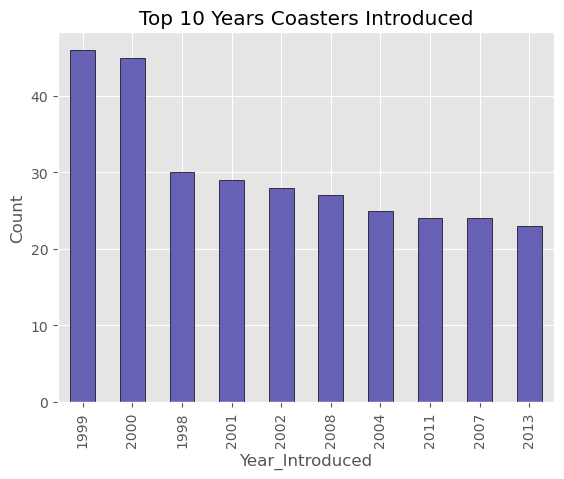

In [23]:
ax = df['Year_Introduced'].value_counts().head(10).plot(kind='bar', color = '#6761b5', edgecolor = 'black',
       title='Top 10 Years Coasters Introduced')
ax.set_xlabel('Year_Introduced')
ax.set_ylabel('Count')

Text(0.5, 0, 'Speed (mph)')

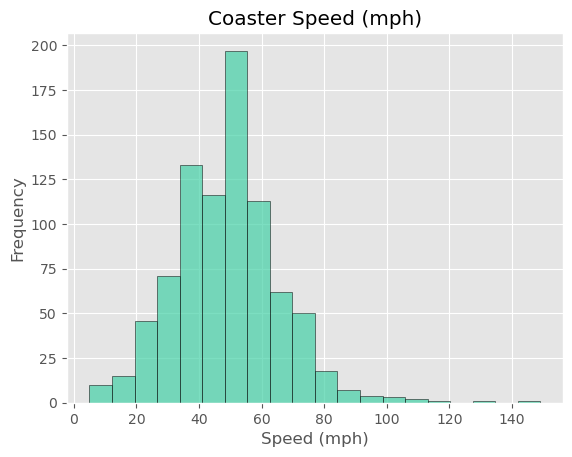

In [27]:
ax = df['Speed_mph'].plot(kind = 'hist', color = '#45d1a7', bins = 20, alpha = 0.7, 
                          edgecolor = 'black',
       title='Coaster Speed (mph)' )
ax.set_xlabel('Speed (mph)')

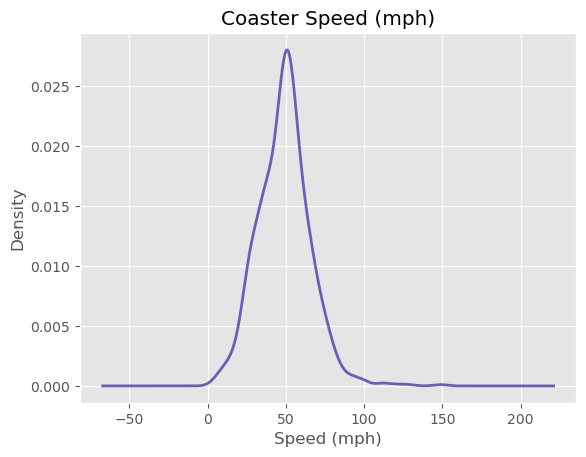

In [28]:
ax = df['Speed_mph'].plot(kind = 'kde', color = '#6761b5', linewidth = 2,
       title='Coaster Speed (mph)' )
ax.set_xlabel('Speed (mph)')
ax.grid(True)
plt.show()

In [29]:
df['Type_Main'].value_counts()

Type_Main
Steel    728
Wood     191
Other     71
Name: count, dtype: int64

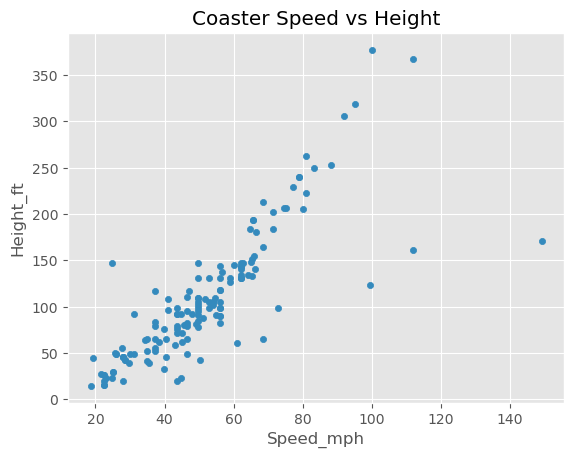

In [31]:
df.plot(kind = 'scatter', x = 'Speed_mph', y = 'Height_ft',
       title='Coaster Speed vs Height' )
plt.show()

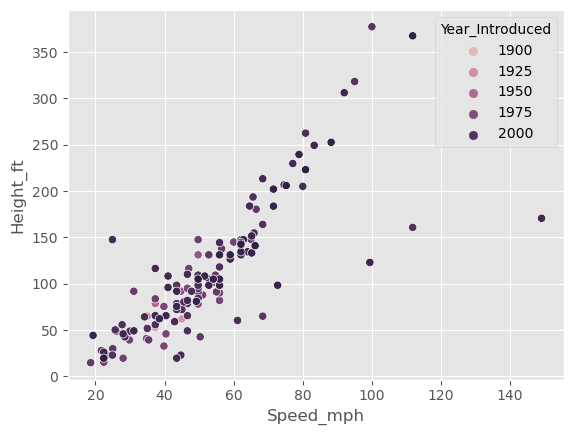

In [32]:
ax = sns.scatterplot(x = 'Speed_mph', y = 'Height_ft', hue = 'Year_Introduced', data = df
       )
ax.set_title='Coaster Speed vs Height'
plt.show()

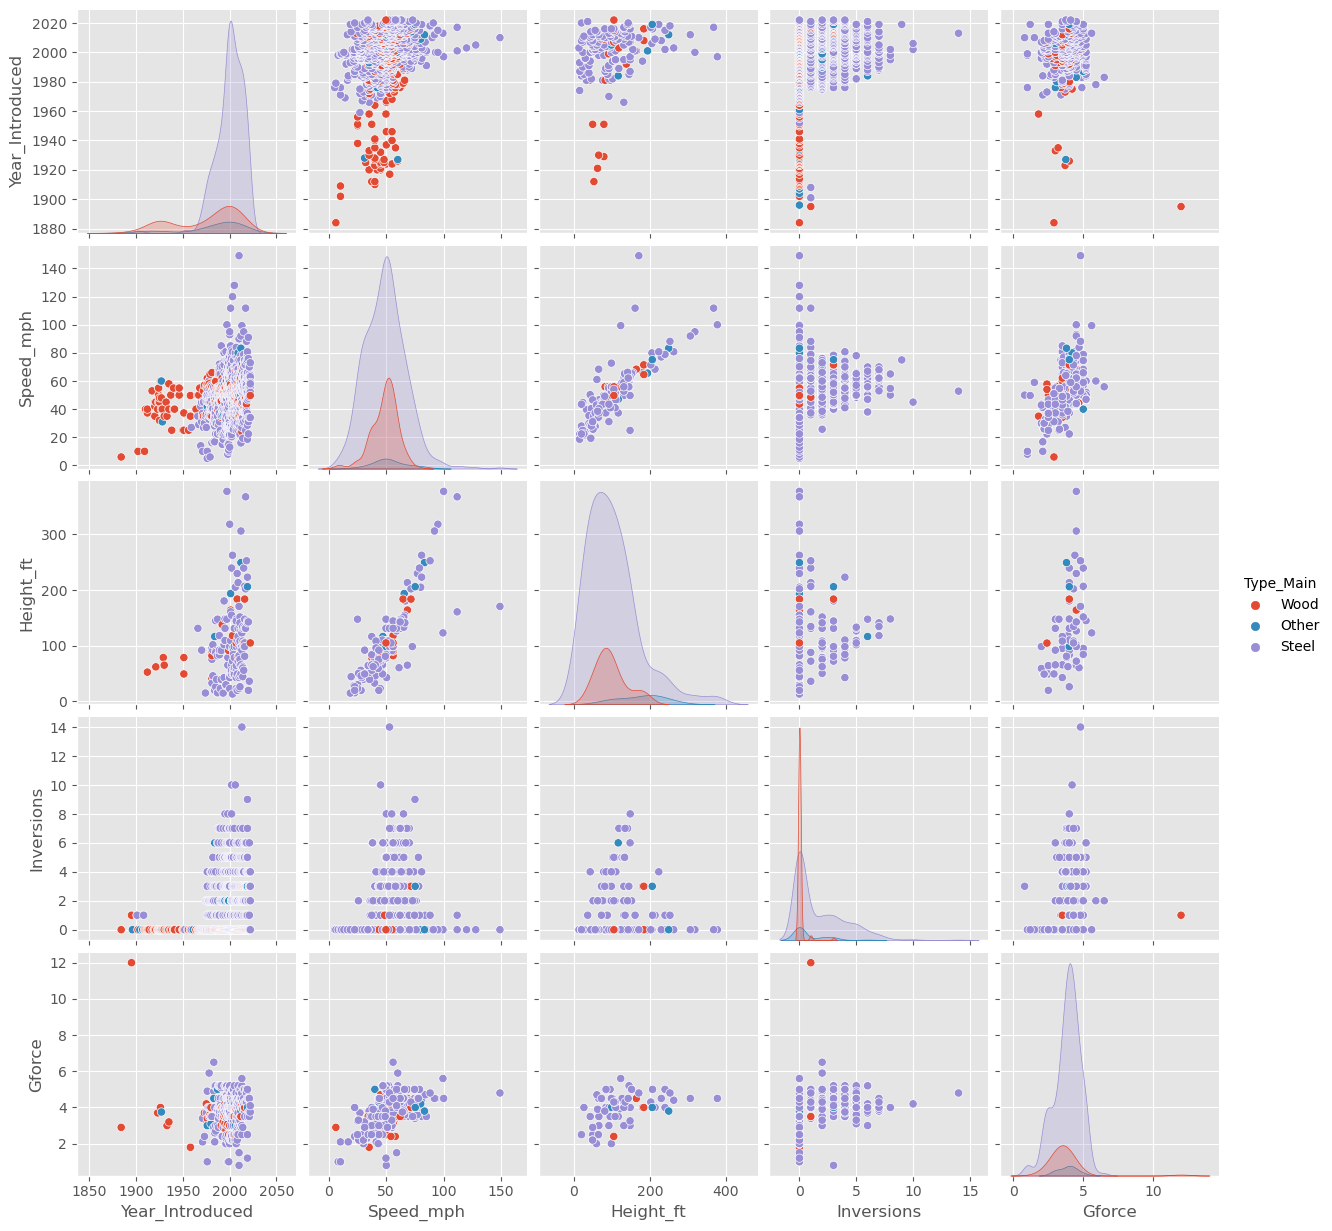

In [33]:
sns.pairplot(df, vars = ['Year_Introduced', 'Speed_mph',
       'Height_ft', 'Inversions', 'Gforce'], hue ='Type_Main' )
plt.show()


In [37]:
df_corr = df[['Year_Introduced', 'Speed_mph',
       'Height_ft', 'Inversions', 'Gforce']].dropna().corr()
df_corr

,Year_Introduced,Speed_mph,Height_ft,Inversions,Gforce
Year_Introduced,1.000000,0.171978,0.135413,-0.209887,0.160247
Speed_mph,0.171978,1.000000,0.733999,-0.028705,0.607383
Height_ft,0.135413,0.733999,1.000000,-0.079736,0.466482
Inversions,-0.209887,-0.028705,-0.079736,1.000000,0.275991
Gforce,0.160247,0.607383,0.466482,0.275991,1.000000


<Axes: >

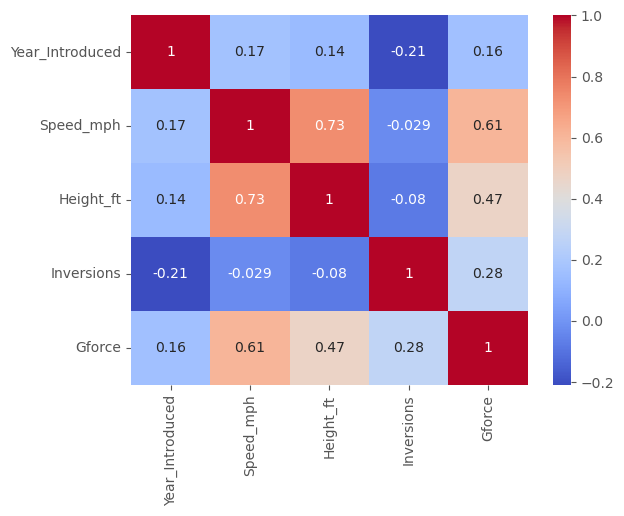

In [38]:
sns.heatmap(df_corr, annot = True, cmap = 'coolwarm')

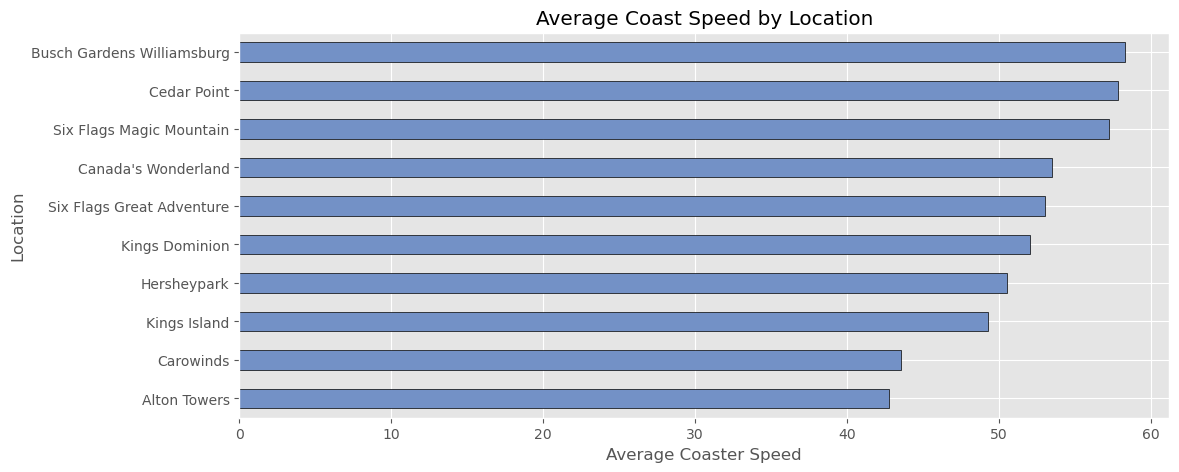

In [39]:
ax = df.query('Location != "Other"').groupby('Location')['Speed_mph'].agg(['mean','count']).query('count >= 10').sort_values('mean')['mean'].plot(kind = 'barh', figsize = (12, 5),
               color = '#7391c6', edgecolor = 'black', title = 'Average Coast Speed by Location')
ax.set_xlabel('Average Coaster Speed')
plt.show()